# DSNet:  Automatic Dermoscopic Skin Lesion Segmentation


* Through  this  study,  we  present  a  new  and  automatic  semantic  segmentation  network for robust skin lesion segmentation named Dermoscopic Skin Network (DSNet).

* In order to reduce the number of parameters to make the network lightweight, we used a depth-wise separable convolution in lieu of standard convolution to project the learnt discriminating features onto the pixel space at different stages of the encoder.

#### This code is dedicated for the plotting of the ROC curves for proposed DSNet, UNet, and FCN8s. The class wise ROC curves are also been plotted using this code. 

* For any query: 
        ** Md. Kamrul Hasan 
        ** M.Sc. in Medical Imaging and Applications (MAIA)
        ** Erasmus Scholar [2017-2019] 
        ** Contact: kamruleeekuet@gmail.com

## Import the python Packages 

In [1]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
import glob
from PIL import Image
import skimage
from matplotlib import pyplot as plt
%matplotlib inline
from skimage.morphology import disk
from sklearn.metrics import confusion_matrix
from skimage.measure import label, regionprops
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import jaccard_similarity_score
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
axisRange = [-0.01, 0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1.0]

## Load the Data for plotting the ROC curve.
#### Each .txt file contain the total images after flattening where “true_xx.txt” contains the true values of the masks [0,1] and “predict_xx.txt” contains the predicted probability from the network. The dimention of the contents in a .txt file is "Image_Number x Rows x Columns"

### For FCN on ISIC

In [2]:
fpr_fcn, tpr_fcn, thresholds_fcn = roc_curve(np.loadtxt('true_fcn.txt'),
                                             np.loadtxt('predict_fcn.txt'))

auc_fcn = roc_auc_score(np.loadtxt('true_fcn.txt'),
                        np.loadtxt('predict_fcn.txt'))

### For UNet on ISIC

In [3]:
fpr_unet, tpr_unet, thresholds_unet = roc_curve(np.loadtxt('true_unet.txt'),
                                                np.loadtxt('predict_unet.txt'))

auc_unet = roc_auc_score(np.loadtxt('true_unet.txt'),
                     np.loadtxt('predict_unet.txt'))

### For DSNet on Melanoma of ISIC

In [4]:
fpr_isic_mel, tpr_isic_mel, thresholds_isic_mel = roc_curve(np.loadtxt('true_isic_mel.txt'),
                                                            np.loadtxt('predict_isic_mel.txt'))

auc_isic_mel = roc_auc_score(np.loadtxt('true_isic_mel.txt'),
                             np.loadtxt('predict_isic_mel.txt'))

### For DSNet on SK of ISIC

In [5]:
fpr_isic_sk, tpr_isic_sk, thresholds_isic_sk = roc_curve(np.loadtxt('true_isic_sk.txt'),
                                                         np.loadtxt('predict_isic_sk.txt'))

auc_isic_sk = roc_auc_score(np.loadtxt('true_isic_sk.txt'),
                            np.loadtxt('predict_isic_sk.txt'))

### For DSNet on Ben/ Nev of ISIC

In [6]:
fpr_isic_ben, tpr_isic_ben, thresholds_isic_ben = roc_curve(np.loadtxt('true_isic_ben.txt'),
                                                np.loadtxt('predict_isic_ben.txt'))

auc_isic_ben = roc_auc_score(np.loadtxt('true_isic_ben.txt'),
                         np.loadtxt('predict_isic_ben.txt'))

### For DSNet on ISIC

In [7]:
fpr_isic, tpr_isic, thresholds_isic = roc_curve(np.loadtxt('true_isic.txt'),
                                                np.loadtxt('predict_isic.txt'))

auc_isic = roc_auc_score(np.loadtxt('true_isic.txt'),
                         np.loadtxt('predict_isic.txt'))

### For DSNet on PH2

In [8]:
fpr_ph, tpr_ph, thresholds_ph = roc_curve(np.loadtxt('true_ph.txt'),
                                          np.loadtxt('predict_ph.txt'))

auc_ph = roc_auc_score(np.loadtxt('true_ph.txt'),
                       np.loadtxt('predict_ph.txt'))

### For DSNet on Melanoma of PH2

In [9]:
fpr_ph_mel, tpr_ph_mel, thresholds_ph_mel = roc_curve(np.loadtxt('true_ph_mel.txt'), 
                                                      np.loadtxt('predict_ph_mel.txt'))

auc_ph_mel = roc_auc_score(np.loadtxt('true_ph_mel.txt'),
                           np.loadtxt('predict_ph_mel.txt'))

### For DSNet on Ben/ Nev of PH2

In [10]:
fpr_ph_ben, tpr_ph_ben, thresholds_ph_ben = roc_curve(np.loadtxt('true_ph_ben.txt'),
                                                      np.loadtxt('predict_ph_ben.txt'))

auc_ph_ben = roc_auc_score(np.loadtxt('true_ph_ben.txt'),
                           np.loadtxt('predict_ph_ben.txt'))

## Class wise ROC curves for the segmentated masks using the proposed DSNet for mel and nev classes of PH2 dataset

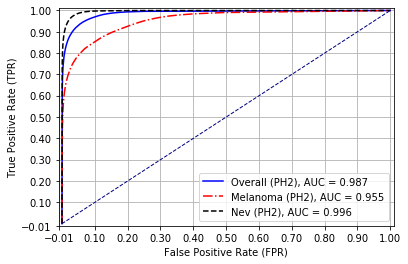

In [11]:
lw = 1
plt.grid(True)
plt.plot(fpr_ph, tpr_ph,'-b',label='Overall (PH2), AUC = '+str(round(auc_ph,3)))
plt.plot(fpr_ph_mel, tpr_ph_mel,'-.r',label='Melanoma (PH2), AUC = '+str(round(auc_ph_mel,3)))
plt.plot(fpr_ph_ben, tpr_ph_ben,'--k',label='Nev (PH2), AUC = '+str(round(auc_ph_ben,3)))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xticks(axisRange)
plt.yticks(axisRange)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

## Class wise ROC curves for the segmentated masks using the proposed DSNet for mel, sk, and nev classes of ISIC-2017 test dataset 

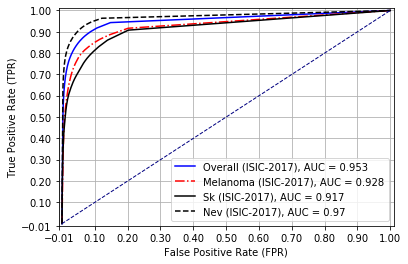

In [12]:
lw = 1
plt.grid(True)
plt.plot(fpr_isic, tpr_isic,'-b',label='Overall (ISIC-2017), AUC = '+str(round(auc_isic,3)))
plt.plot(fpr_isic_mel, tpr_isic_mel,'-.r',label='Melanoma (ISIC-2017), AUC = '+str(round(auc_isic_mel,3)))
plt.plot(fpr_isic_sk, tpr_isic_sk,'k',label='Sk (ISIC-2017), AUC = '+str(round(auc_isic_sk,3)))
plt.plot(fpr_isic_ben, tpr_isic_ben,'--k',label='Nev (ISIC-2017), AUC = '+str(round(auc_isic_ben,3)))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xticks(axisRange)
plt.yticks(axisRange)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

## ROC curves for the segmentated masks using the proposed DSNet, UNet, and FCN8s on ISIC-2017 test dataset 

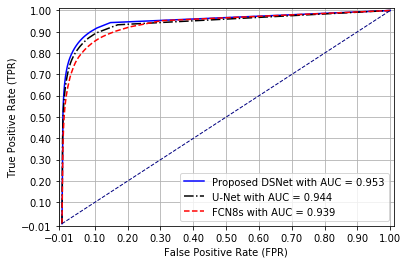

In [13]:
lw = 1
plt.grid(True)
plt.plot(fpr_isic, tpr_isic,'-b',label='Proposed DSNet with AUC = '+str(round(auc_isic,3)))
plt.plot(fpr_unet, tpr_unet,'-.k',label='U-Net with AUC = '+str(round(auc_unet,3)))
plt.plot(fpr_fcn, tpr_fcn,'--r',label='FCN8s with AUC = '+str(round(auc_fcn,3)))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xticks(axisRange)
plt.yticks(axisRange)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()